In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('datasets/openpowerlifting.csv')

In [7]:
df

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,NaN,Elite,113.58,125,NaN,NaN,NaN,NaN,NaN,347.50,347.50,2,202.60
386410,8481,Justin Zottl,M,Multi-ply,NaN,Elite,119.02,125,NaN,NaN,NaN,NaN,NaN,322.50,322.50,3,185.77
386411,8481,Jake Anderson,M,Multi-ply,NaN,Elite,120.29,125,NaN,NaN,NaN,NaN,NaN,367.50,367.50,1,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,NaN,Elite,126.73,140,NaN,NaN,NaN,NaN,NaN,320.00,320.00,3,181.85


In [19]:
# Избавление от дубликатов
df = df.drop_duplicates(subset=['Name'])

In [20]:
# Количество пропущенных объектов в каждом признаке
df.isna().sum()

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age                82737
Division            6412
BodyweightKg         942
WeightClassKg       1447
Squat4Kg          136217
BestSquatKg        27294
Bench4Kg          135967
BestBenchKg         9683
Deadlift4Kg       135612
BestDeadliftKg     20693
TotalKg             8118
Place                534
Wilks               8568
dtype: int64

In [59]:
# Доля пропущенных значений
percent_nan = (df.isna().sum() / len(df) * 100).round(2)
percent_nan

MeetID             0.00
Name               0.00
Sex                0.00
Equipment          0.00
Age               60.53
Division           4.69
BodyweightKg       0.69
WeightClassKg      1.06
Squat4Kg          99.66
BestSquatKg       19.97
Bench4Kg          99.47
BestBenchKg        7.08
Deadlift4Kg       99.21
BestDeadliftKg    15.14
TotalKg            5.94
Place              0.39
Wilks              6.27
dtype: float64

In [28]:
df[['Age', 'Division']].head()

,Age,Division
0,47.0,Mst 45-49
1,42.0,Mst 40-44
4,18.0,Teen 18-19
5,28.0,Open Senior
6,60.0,Mst 60-64


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

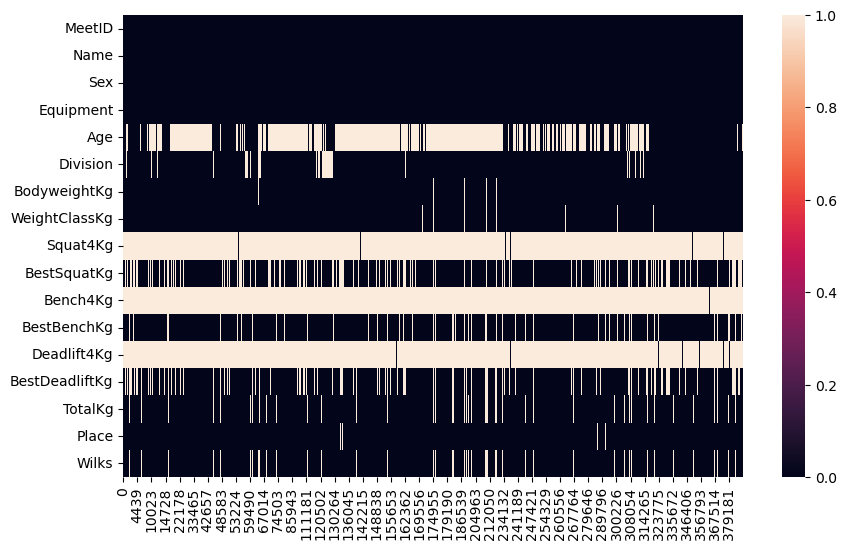

In [34]:
# Визуализация пропусков
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose());

**Удаление признаков, в которых доля пропусков выше заданного порога(threshold)**


**.drop()**

In [60]:
percent_nan[percent_nan > 70]

Squat4Kg       99.66
Bench4Kg       99.47
Deadlift4Kg    99.21
dtype: float64

In [69]:
df.drop(columns=percent_nan[percent_nan > 70].index)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,170.10,77.11,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386398,8481,Molly Headly,F,Multi-ply,NaN,Elite,86.73,90,NaN,NaN,220.00,220.00,1,193.20
386402,8481,Bryan Doderdruk,M,Multi-ply,NaN,Elite,97.43,100,NaN,NaN,352.50,352.50,2,216.85
386403,8481,Shawn Schumaker,M,Multi-ply,NaN,Elite,98.79,100,NaN,NaN,365.00,365.00,1,223.24
386406,8481,Matthew Ladewski,M,Multi-ply,NaN,Elite,99.97,100,NaN,NaN,325.00,325.00,4,197.82


**dropna()**

`axis=1` - Колонки \
`axis=0` - Строки (default)\
`how='all'` - Если пропущены ВСЕ значения в указанной строке или колонке то она удалится(default)\
`thresh` - threshhold - пороговое значение, удалит строку/столбец если в нем больше порогового значения пропусков \
`subset` - Удаляет строку если в заданном признаке этой строки пропущено значение

In [72]:
# Если в колонке есть хоть один пропуск - она будет полностью удалена
tmp = df.dropna(axis=1)
tmp

,MeetID,Name,Sex,Equipment
0,0,Angie Belk Terry,F,Wraps
1,0,Dawn Bogart,F,Single-ply
4,0,Destiny Dula,F,Raw
5,0,Courtney Norris,F,Wraps
6,0,Maureen Clary,F,Raw
...,...,...,...,...
386398,8481,Molly Headly,F,Multi-ply
386402,8481,Bryan Doderdruk,M,Multi-ply
386403,8481,Shawn Schumaker,M,Multi-ply
386406,8481,Matthew Ladewski,M,Multi-ply


In [96]:
# Пороговое значение существующих данных (100%)
thresh=tmp.shape[0]*1
thresh

136687

In [98]:
# Удалит все столбцы в которых присутствующих значений меньше порога в 100 процентов выборки
tmp = df.dropna(thresh=thresh, axis=1)
tmp

,MeetID,Name,Sex,Equipment
0,0,Angie Belk Terry,F,Wraps
1,0,Dawn Bogart,F,Single-ply
4,0,Destiny Dula,F,Raw
5,0,Courtney Norris,F,Wraps
6,0,Maureen Clary,F,Raw
...,...,...,...,...
386398,8481,Molly Headly,F,Multi-ply
386402,8481,Bryan Doderdruk,M,Multi-ply
386403,8481,Shawn Schumaker,M,Multi-ply
386406,8481,Matthew Ladewski,M,Multi-ply


In [125]:
# Пороговое значение существующих данных (90%)
thresh=tmp.shape[0]*0.90
thresh

123018.3

In [126]:
tmp = df.dropna(thresh=thresh, axis=1)
tmp

,MeetID,Name,Sex,Equipment,Division,BodyweightKg,WeightClassKg,BestBenchKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,Mst 45-49,59.60,60,20.41,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,Mst 40-44,58.51,60,95.25,401.42,1,456.38
4,0,Destiny Dula,F,Raw,Teen 18-19,63.68,67.5,31.75,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,Open Senior,62.41,67.5,77.11,392.36,1,424.40
6,0,Maureen Clary,F,Raw,Mst 60-64,67.31,67.5,95.25,383.28,1,391.98
...,...,...,...,...,...,...,...,...,...,...,...
386398,8481,Molly Headly,F,Multi-ply,Elite,86.73,90,NaN,220.00,1,193.20
386402,8481,Bryan Doderdruk,M,Multi-ply,Elite,97.43,100,NaN,352.50,2,216.85
386403,8481,Shawn Schumaker,M,Multi-ply,Elite,98.79,100,NaN,365.00,1,223.24
386406,8481,Matthew Ladewski,M,Multi-ply,Elite,99.97,100,NaN,325.00,4,197.82


In [105]:
# Удалит те строки у которых пропуск в колонке Name
tmp = df.dropna(subset='Name')
tmp

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386398,8481,Molly Headly,F,Multi-ply,NaN,Elite,86.73,90,NaN,NaN,NaN,NaN,NaN,220.00,220.00,1,193.20
386402,8481,Bryan Doderdruk,M,Multi-ply,NaN,Elite,97.43,100,NaN,NaN,NaN,NaN,NaN,352.50,352.50,2,216.85
386403,8481,Shawn Schumaker,M,Multi-ply,NaN,Elite,98.79,100,NaN,NaN,NaN,NaN,NaN,365.00,365.00,1,223.24
386406,8481,Matthew Ladewski,M,Multi-ply,NaN,Elite,99.97,100,NaN,NaN,NaN,NaN,NaN,325.00,325.00,4,197.82


In [106]:
# Удалит те строки у которых пропуск в колонке Bench4Kg
tmp = df.dropna(subset='Bench4Kg')
tmp

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
44,0,James Adams,M,Raw,37.0,Open Senior,88.72,90,NaN,NaN,-226.80,217.72,NaN,NaN,217.72,1,140.02
54,0,David Crater,M,Raw,43.0,Mst 40-44,109.41,110,NaN,NaN,-210.92,206.38,NaN,NaN,206.38,1,121.66
572,9,Macy Lantz,F,Raw,14.0,T1-Teen,59.69,60,NaN,60.00,-40.01,37.50,87.50,80.00,177.50,1,198.69
744,12,Chuck Baumohi,M,Raw,76.0,M-M8B-R-X,82.92,90,NaN,NaN,-142.50,137.50,NaN,NaN,137.50,1,91.83
824,15,Rocky Luedeker,F,Raw,61.0,R Open,45.27,48,42.5,37.50,33.50,32.50,60.00,57.50,127.50,1,176.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385364,8463,Ilya Grushin,M,Raw,17.0,Junior,81.20,82.5,NaN,NaN,115.00,110.00,NaN,NaN,110.00,1,74.40
385365,8463,Ilya Goloshumov,M,Raw,25.0,Open,77.40,82.5,NaN,NaN,-105.00,102.50,NaN,NaN,102.50,1,71.49
385370,8463,Evgeniy Shtefan,M,Raw,34.0,Open,125.20,100+,NaN,NaN,-200.00,192.50,NaN,NaN,192.50,1,109.66
385371,8463,Konstantin Chumilovich,M,Raw,30.0,Open,104.00,100+,NaN,NaN,-180.00,175.00,NaN,NaN,175.00,2,104.93


In [127]:
# Удалить столбцы в которых не присутствует треть данных и больше(Отсутсвтует 2/3)
df.dropna(thresh=df.shape[0]//3, axis=1, inplace=True)

C:\Users\rassi\AppData\Local\Temp\ipykernel_17072\1981702593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(thresh=df.shape[0]//3, axis=1, inplace=True)


In [129]:
df.shape

(136687, 14)

In [131]:
# Удалить строки в которых не присутствует 10 данных(4 и больше пропуска)
df.dropna(axis=0, thresh=10, inplace=True)

C:\Users\rassi\AppData\Local\Temp\ipykernel_17072\3545576965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, thresh=10, inplace=True)


In [133]:
df.shape

(131989, 14)

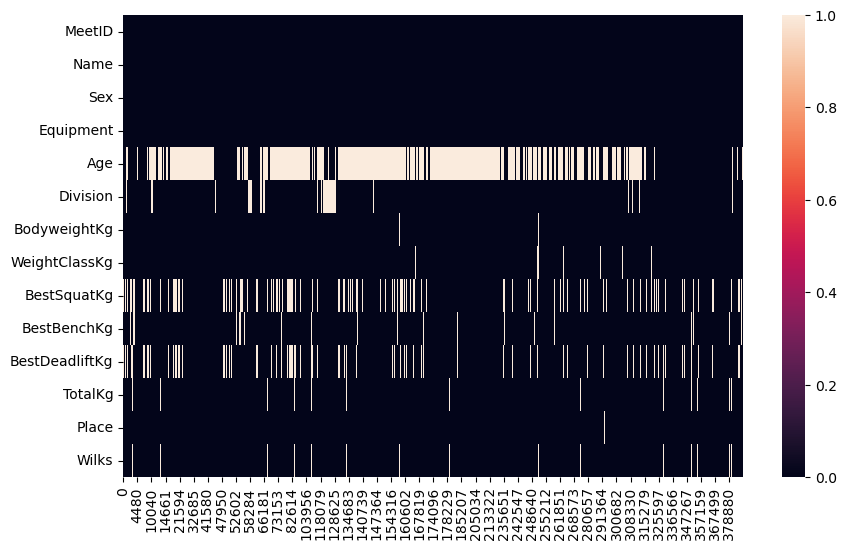

In [135]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose());

**Заполнение пропусков мерами центральной тенденции**

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131989 entries, 0 to 386412
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          131989 non-null  int64  
 1   Name            131989 non-null  object 
 2   Sex             131989 non-null  object 
 3   Equipment       131989 non-null  object 
 4   Age             53077 non-null   float64
 5   Division        125978 non-null  object 
 6   BodyweightKg    131680 non-null  float64
 7   WeightClassKg   131112 non-null  object 
 8   BestSquatKg     108337 non-null  float64
 9   BestBenchKg     126701 non-null  float64
 10  BestDeadliftKg  115822 non-null  float64
 11  TotalKg         128396 non-null  float64
 12  Place           131485 non-null  object 
 13  Wilks           128087 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.1+ MB


**Количественный признак**

In [139]:
# Вес человека
df['BodyweightKg'].isna().sum()

309

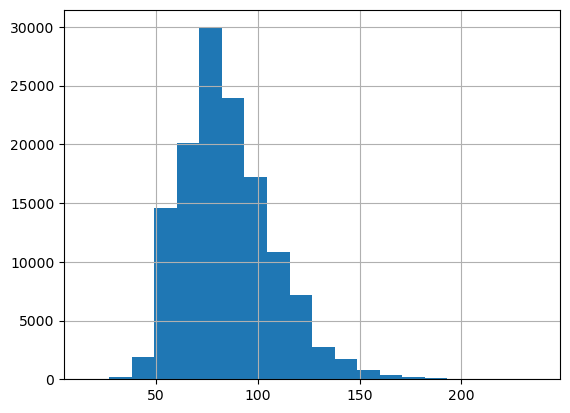

In [141]:
df['BodyweightKg'].hist(bins=20);

In [148]:
df['BodyweightKg'].median(), df['BodyweightKg'].mean()

(82.1, 85.3414074954435)

In [151]:
df['BodyweightKg'].fillna(df['BodyweightKg'].median(), inplace=True)

C:\Users\rassi\AppData\Local\Temp\ipykernel_17072\1645924329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BodyweightKg'].fillna(df['BodyweightKg'].median(), inplace=True)


In [153]:
df['BodyweightKg'].isna().sum()

0

**Признак качественный**

In [156]:
df['Division'].value_counts()

Division
Open            21465
Boys            14753
R-O             10453
Amateur Open     5038
R-JR             3315
                ...  
M_MEM_7_APF         1
F-H-R-CR            1
M_MCR_6_AAPF        1
M-M-BO-R            1
Pro Heavy           1
Name: count, Length: 3137, dtype: int64

In [157]:
df['Division'].unique()

array(['Mst 45-49', 'Mst 40-44', 'Teen 18-19', ..., 'Elite',
       'Expert Open', 'Pro Heavy'], dtype=object)

In [162]:
# Количество категорий
len(df['Division'].unique())

3138

In [169]:
# Количество категорий после приведения к единому нижнему регистру
# Количество стало меньше, значит были категории которые себя дублировали из за разности регистров
len(df['Division'].str.lower().unique())

3029

In [170]:
df['Division'] = df['Division'].str.lower()

C:\Users\rassi\AppData\Local\Temp\ipykernel_17072\1320417111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Division'] = df['Division'].str.lower()


In [171]:
df['Division'].value_counts()

Division
open            21679
boys            14753
r-o             10453
amateur open     5076
r-jr             3315
                ...  
aretroopen          1
n                   1
dlint               1
retrom1             1
pro heavy           1
Name: count, Length: 3028, dtype: int64

In [172]:
df['Division'].mode()

0    open
Name: Division, dtype: object

In [173]:
# Из за того что функция моды возвращает не число а единичный объект Series достанем ее через индекс
df['Division'].mode().iloc[0]

'open'

In [175]:
df['Division'] = df['Division'].fillna(df['Division'].mode().iloc[0])

C:\Users\rassi\AppData\Local\Temp\ipykernel_17072\2300684698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Division'] = df['Division'].fillna(df['Division'].mode().iloc[0])


In [178]:
df.Division.isna().sum()

0

**Индикатор**

In [179]:
df['Place']

0         1
1         1
4         1
5         1
6         1
         ..
386398    1
386402    2
386403    1
386406    4
386412    3
Name: Place, Length: 131989, dtype: object

In [181]:
df['Place'].value_counts()

Place
1     64521
2     21006
3     11305
4      7270
5      5083
      ...  
69        1
66        1
76        1
68        1
63        1
Name: count, Length: 79, dtype: int64

In [180]:
df['Place'].isna().sum()

504

In [182]:
# Новый признак
df['Place_NaN'] = 0
df.head()

C:\Users\rassi\AppData\Local\Temp\ipykernel_17072\2838230802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Place_NaN'] = 0


,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,Place_NaN
0,0,Angie Belk Terry,F,Wraps,47.0,mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05,0
1,0,Dawn Bogart,F,Single-ply,42.0,mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38,0
4,0,Destiny Dula,F,Raw,18.0,teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47,0
5,0,Courtney Norris,F,Wraps,28.0,open senior,62.41,67.5,170.10,77.11,145.15,392.36,1,424.40,0
6,0,Maureen Clary,F,Raw,60.0,mst 60-64,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98,0


In [191]:
# Все строки в которых у признака Place пропуск, изменить соответствующие значения в признаке Place_NaN на единицу
df.loc[df['Place'].isna(), 'Place_NaN'] = 1

In [193]:
df.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,Place_NaN
0,0,Angie Belk Terry,F,Wraps,47.0,mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05,0
1,0,Dawn Bogart,F,Single-ply,42.0,mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38,0
4,0,Destiny Dula,F,Raw,18.0,teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47,0
5,0,Courtney Norris,F,Wraps,28.0,open senior,62.41,67.5,170.10,77.11,145.15,392.36,1,424.40,0
6,0,Maureen Clary,F,Raw,60.0,mst 60-64,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98,0


In [197]:
df.loc[df['Place'].notna()]

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,Place_NaN
0,0,Angie Belk Terry,F,Wraps,47.0,mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05,0
1,0,Dawn Bogart,F,Single-ply,42.0,mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38,0
4,0,Destiny Dula,F,Raw,18.0,teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47,0
5,0,Courtney Norris,F,Wraps,28.0,open senior,62.41,67.5,170.10,77.11,145.15,392.36,1,424.40,0
6,0,Maureen Clary,F,Raw,60.0,mst 60-64,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386398,8481,Molly Headly,F,Multi-ply,NaN,elite,86.73,90,NaN,NaN,220.00,220.00,1,193.20,0
386402,8481,Bryan Doderdruk,M,Multi-ply,NaN,elite,97.43,100,NaN,NaN,352.50,352.50,2,216.85,0
386403,8481,Shawn Schumaker,M,Multi-ply,NaN,elite,98.79,100,NaN,NaN,365.00,365.00,1,223.24,0
386406,8481,Matthew Ladewski,M,Multi-ply,NaN,elite,99.97,100,NaN,NaN,325.00,325.00,4,197.82,0


In [199]:
df['Place_NaN'].value_counts()

Place_NaN
0    131485
1       504
Name: count, dtype: int64

In [201]:
df['Place_NaN'].value_counts().sum()

131989

In [202]:
df['Place'].isna().sum()

504

In [205]:
df['Place'].fillna(0, inplace=True)
df['Place'].isna().sum()

C:\Users\rassi\AppData\Local\Temp\ipykernel_17072\586890117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Place'].fillna(0, inplace=True)


0

In [206]:
df[df['Place_NaN']==1].head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,Place_NaN
3517,62,Pam McKeage,F,Raw,32.0,open,68.9,NaN,NaN,47.5,95.0,142.5,0,143.34,1
4927,81,Chandan McCall,M,Raw,17.0,teen,116.8,NaN,215.0,140.0,220.0,575.0,0,332.76,1
4928,81,Paolo DeMarco,M,Raw,19.0,teen,77.1,NaN,150.0,115.0,165.0,430.0,0,300.68,1
4929,81,Keller Nicolai,M,Raw,16.0,teen,102.5,NaN,157.5,105.0,187.5,450.0,0,271.26,1
4934,81,Lisa O'Kane,F,Raw,29.0,open,65.3,NaN,115.0,70.0,125.0,310.0,0,324.12,1


In [208]:
df['WeightClassKg'].value_counts(dropna=False)

WeightClassKg
90       12781
82.5     12059
75       12035
100      11751
67.5      9630
110       8800
125       6732
93        5718
83        5477
60        4858
105       4223
74        3883
72        3375
52        3270
56        3191
63        2756
120       2307
84        2193
140       2035
57        1829
66        1763
84+       1732
90+       1476
125+      1417
140+      1409
120+      1407
NaN        877
59         811
48         611
47         406
44         321
117.5      290
53         189
110+        86
43          68
40          35
75+         33
35          33
70          20
80          19
30          18
145         16
100+        13
95          10
145+         7
83+          6
70+          5
67.5+        3
60+          3
39           2
Name: count, dtype: int64

In [209]:
df['WeightClassKg'].fillna('Unknown', inplace=True)

C:\Users\rassi\AppData\Local\Temp\ipykernel_17072\3608703959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WeightClassKg'].fillna('Unknown', inplace=True)
C:\Users\rassi\AppData\Local\Temp\ipykernel_17072\3608703959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WeightClassKg'].fillna('Unknown', inplace=True)


In [210]:
df['WeightClassKg'].isna().sum()

0

In [211]:
df.isna().sum()

MeetID                0
Name                  0
Sex                   0
Equipment             0
Age               78912
Division              0
BodyweightKg          0
WeightClassKg         0
BestSquatKg       23652
BestBenchKg        5288
BestDeadliftKg    16167
TotalKg            3593
Place                 0
Wilks              3902
Place_NaN             0
dtype: int64